In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

# Reading and Preprocessing Data

In [184]:
# Loading Data
data_df = pd.read_csv("House_Rent_Dataset.csv")
# Keeping only the specific attributes
label = 'Rent'
features = ['BHK', 'Size', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Bathroom']
x_df = data_df.loc[:, features]
y_df = pd.DataFrame(data_df.loc[:, label])
x_df

,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom
0,2,1100,Super Area,Bandel,Kolkata,Unfurnished,2
1,2,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,1
2,2,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1
3,2,800,Super Area,Dumdum Park,Kolkata,Unfurnished,1
4,2,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1
...,...,...,...,...,...,...,...
4741,2,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,2
4742,3,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,3
4743,3,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,3
4744,3,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,2


In [185]:
# Converts categorical value to numerical values
def categorical_to_numerical(df, column_name):
    unique_values = np.unique(df[column_name])
    unique_nums = list(range(0, unique_values.__len__()))
    df[column_name] = df[column_name].replace(unique_values, unique_nums)

In [186]:
# Converting string values to numerical values
categorical_to_numerical(x_df, 'Area Type')
categorical_to_numerical(x_df, 'Area Locality')
categorical_to_numerical(x_df, 'City')
categorical_to_numerical(x_df, 'Furnishing Status')

Normalizing Features and Labels

In [187]:
# Normalizes the features
def normalize(df, column):
    mean = np.mean(df[column])
    std = np.std(df[column])
    df[column] = (df[column] - mean) / std
    return (mean, std)

In [188]:
# Hold values used for normalization
normalized_dict = {}
# Normalizing all the features
for col in x_df.columns:
    normalized_dict[col] = normalize(x_df, col)
normalized_dict['label'] = normalize(y_df, 'Rent')

# Visualizing Data

In [190]:
# Calculating mean Rent per city
cities = np.unique(data_df.City)
cities_mean_rent = []
for city in cities:
    cities_mean_rent.append(np.mean(data_df.loc[data_df.City == city]['Rent']))

[Text(0.5, 0, 'Cities'), Text(0, 0.5, 'BHK')]

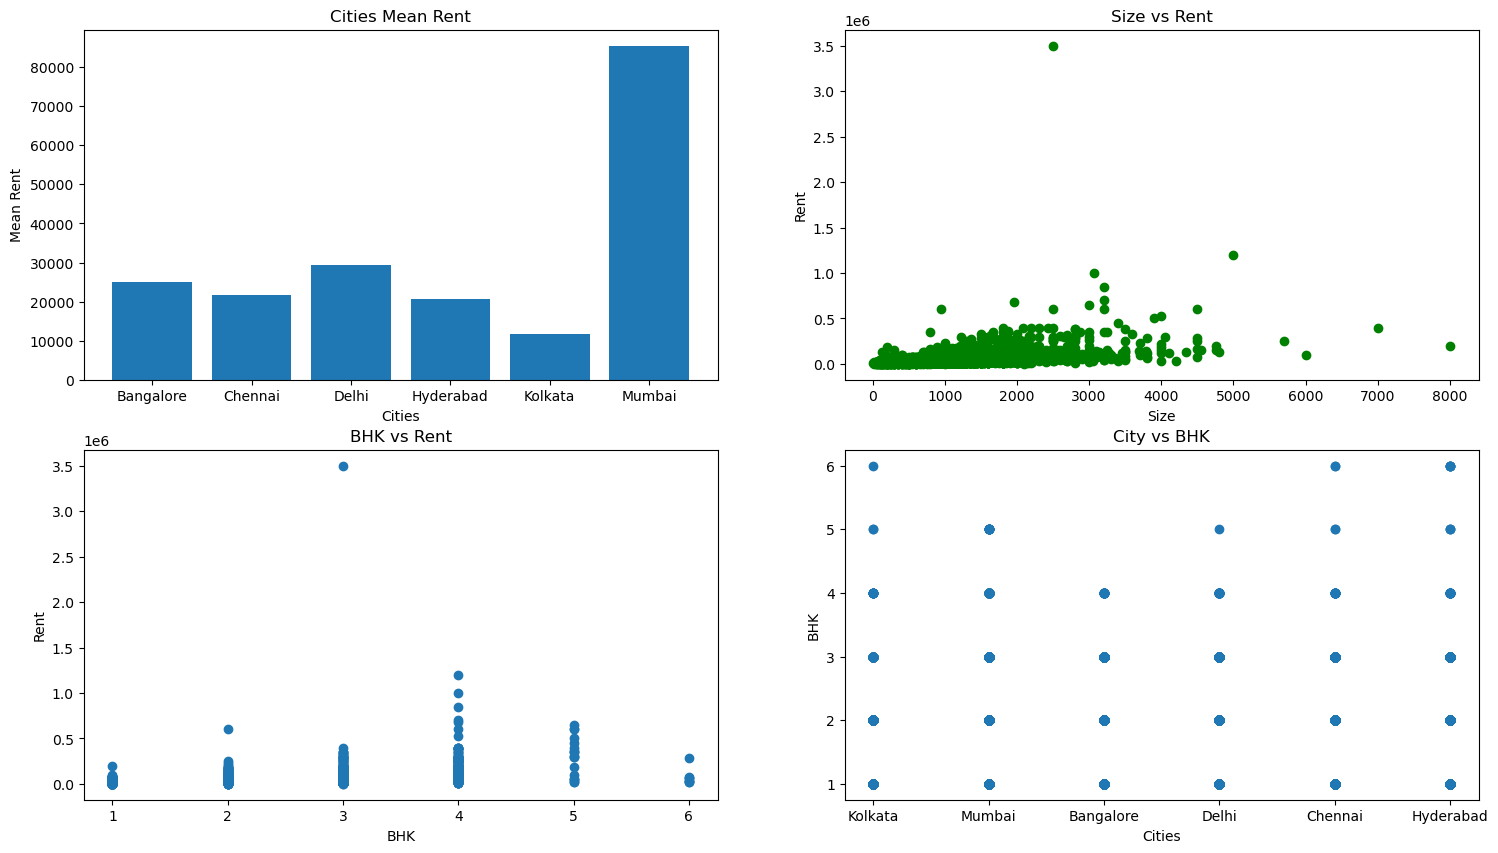

In [191]:
# Plotting multiple data
fig, axs = plt.subplots(2, 2, figsize = (18, 10))

# Cities vs Mean Rent
axs[0, 0].bar(cities, cities_mean_rent)
axs[0, 0].title.set_text('Cities Mean Rent')
plt.setp(axs[0, 0], xlabel='Cities', ylabel='Mean Rent')

# Size vs Rent
axs[0, 1].scatter(data_df.Size, data_df.Rent, c = 'green')
axs[0, 1].title.set_text('Size vs Rent')
plt.setp(axs[0, 1], xlabel='Size', ylabel='Rent')

# BHK vs Rent
axs[1, 0].scatter(data_df.BHK, data_df.Rent)
axs[1, 0].title.set_text('BHK vs Rent')
plt.setp(axs[1, 0], xlabel='BHK', ylabel='Rent')

# City vs BHK
axs[1, 1].scatter(data_df.City, data_df['BHK'])
axs[1, 1].title.set_text('City vs BHK')
plt.setp(axs[1, 1], xlabel='Cities', ylabel='BHK')

# Perfomring Linear Regression

In [192]:
# Declaring Required Variables
n = x_df.columns.__len__() + 1
m = x_df.__len__()
theta = np.random.rand(n, 1)

In [193]:
# Converting X and Y dataframes to arrays
X = np.array(x_df)
y = np.array(y_df)

# Appending column with value 1 to the begining of the array for multiplication with theta(0)
ones = np.ones((m, 1))
X = np.concatenate((ones, X), axis = 1)
X[0]

array([ 1.        , -0.10077301,  0.2089605 ,  0.96888131, -1.37525095,
        0.86344905,  1.11157455,  0.03859399])

Splitting in Training and Testing Datasets

In [194]:
training_size = 0.9
total_training_samples = int(X.shape[0] * training_size)
train_samples = np.random.choice(X.shape[0], total_training_samples, replace = False)
test_samples = np.delete(list(range(0, X.shape[0])), samples).__len__()

# Separating training and testing data
X_train = X[train_samples]
X_test = X[test_samples]
y_train = y[train_samples]
y_test = y[test_samples]

Defining Cost Function

In [195]:
# Calculates the cost
def cost(theta, X, y, lam):
    m = X.shape[0]
    return (1 / (2 * m)) * np.sum( predict(theta, X) - y) + (lam / (2 * m)) * np.sum(np.square(theta))

In [196]:
# Calculates the gradient descent and returns the updated values of the theta
def gradient(theta, X, y, alpha, lam):
    m = X.shape[0]
    return theta - (alpha / m) * np.transpose(np.dot(np.transpose(predict(theta, X) - y), X)) + (lam / m) * theta

In [197]:
# Predicts the values for the data
def predict(theta, X):
    return np.dot(X, theta)

In [198]:
epochs = 200
learning_rate = 0.01
lam = 1.5

In [199]:
history = []
# Training Loop
for i in tqdm(range(epochs)):
    # Determining cost
    epoch_cost = cost(theta, X_train, y_train, lam)
    # Storing the cost history
    history.append(epoch_cost)
    # Displaying data
    print(f'Cost for epoch {i} is {round(epoch_cost, 4)}')
    # Updating the theta
    theta = gradient(theta, X_train, y_train, learning_rate, lam)

100%|██████████| 200/200 [00:00<00:00, 9090.68it/s]

Cost for epoch 0 is 0.1144
Cost for epoch 1 is 0.1132
Cost for epoch 2 is 0.1121
Cost for epoch 3 is 0.1109
Cost for epoch 4 is 0.1098
Cost for epoch 5 is 0.1087
Cost for epoch 6 is 0.1076
Cost for epoch 7 is 0.1065
Cost for epoch 8 is 0.1054
Cost for epoch 9 is 0.1043
Cost for epoch 10 is 0.1033
Cost for epoch 11 is 0.1022
Cost for epoch 12 is 0.1012
Cost for epoch 13 is 0.1002
Cost for epoch 14 is 0.0992
Cost for epoch 15 is 0.0982
Cost for epoch 16 is 0.0972
Cost for epoch 17 is 0.0962
Cost for epoch 18 is 0.0952
Cost for epoch 19 is 0.0943
Cost for epoch 20 is 0.0933
Cost for epoch 21 is 0.0924
Cost for epoch 22 is 0.0915
Cost for epoch 23 is 0.0906
Cost for epoch 24 is 0.0897
Cost for epoch 25 is 0.0888
Cost for epoch 26 is 0.0879
Cost for epoch 27 is 0.087
Cost for epoch 28 is 0.0861
Cost for epoch 29 is 0.0853
Cost for epoch 30 is 0.0844
Cost for epoch 31 is 0.0836
Cost for epoch 32 is 0.0827
Cost for epoch 33 is 0.0819
Cost for epoch 34 is 0.0811
Cost for epoch 35 is 0.0803
Cos

In [200]:
# Predicting the test cost
print(f'Test Loss: {round(cost(theta, X_test, y_test, lam), 2)}')

Test Loss: 0.07


# Plotting Results

Text(0, 0.5, 'Loss')

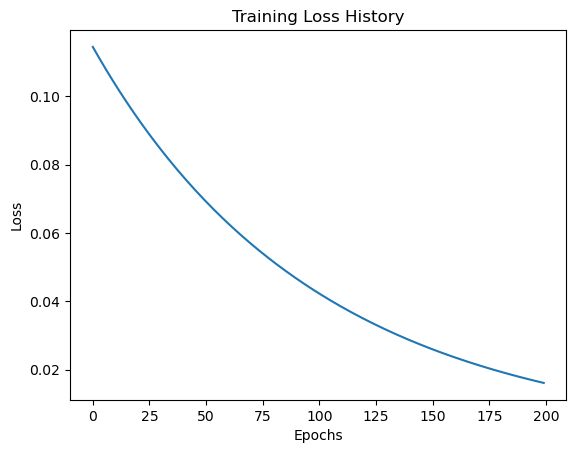

In [201]:
plt.plot(list(range(epochs)), history)
plt.title('Training Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [210]:
# Normalizes the given vector with specified value
def normalize_with_values(X, mean, std):
    return (X - mean) / std

# De-normalizes the value based on the given values
def denormalize(X, mean, std):
    return X * std + mean

In [215]:
# Predicting result for house with 2 BHK, 500 Size, Area Type 1, Location 3, City 2, Furnishing Status 1, and 1 Bathroom
prediction_x = [1, 
    normalize_with_values(4, normalized_dict['BHK'][0], normalized_dict['BHK'][1]), 
    normalize_with_values(200, normalized_dict['Size'][0], normalized_dict['Size'][1]), 
    normalize_with_values(1, normalized_dict['Area Type'][0], normalized_dict['Area Type'][1]), 
    normalize_with_values(3, normalized_dict['Area Locality'][0], normalized_dict['Area Locality'][1]), 
    normalize_with_values(2, normalized_dict['City'][0], normalized_dict['City'][1]), 
    normalize_with_values(1, normalized_dict['Furnishing Status'][0], normalized_dict['Furnishing Status'][1]), 
    normalize_with_values(3, normalized_dict['Bathroom'][0], normalized_dict['Bathroom'][1])]

predict_y = predict(theta, prediction_x)
predicted_value = denormalize(predict_y, normalized_dict['label'][0], normalized_dict['label'][1])
print(f'Predicted Rent is INR {round(predicted_value[0], 2)}')

Predicted Rent is INR 40289.96
